In [155]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import seaborn as sns
import numpy as np
#from tqdm import tqdm_notebook as tqdm
import os 
import re
import pandas as pd
import glob
import re
from IPython import display
os.chdir('/nfs/nhome/live/michaela/Documents/projects/MMD-GAN/')
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image


In [156]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [182]:
filter_path = 'sample_mmd/celebA/bigger_scale_2/celebA64x64_dcgan_dc_rbfd5-10-1_64_128_lr0.00010000_bn/filters/'

good_data = np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-15000_conv0.npy'))
bad_data  =np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-20000_conv0.npy'))

filter_path = 'sample_mmd/celebA/wmmd_rbf_resnet_scale_8/celebA64x64_g-resnet5_dc_rbfd5-10-1_64_128_lr0.00010000_bn/filters/'
good_data = np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-8000_linear0.npy'))
bad_data  =np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-10000_linear0.npy'))

filter_path = 'sample_mmd/cifar10/wmmd_rbf_scale_2_with_clip_bigger_scaling_fixed/cifar1064x64_dcgan_dc_rbfd5-10-1_64_32_lr0.00010000/filters/'
good_data = np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-160000_conv0.npy'))
bad_data  =np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-160000_conv0.npy'))



In [183]:
good_data.shape

(5, 5, 3, 64)

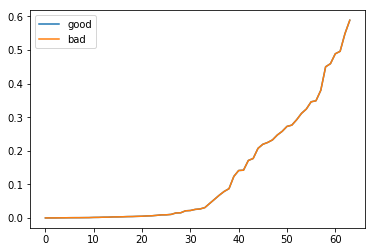

In [184]:
#good_data = np.reshape(good_data, [64,-1])
#bad_data= np.reshape(bad_data, [64,-1])

W_bad = np.zeros([64, 75])
W_good = np.zeros([64, 75])

for i in range(64):
    W_bad[i,:] = bad_data[:,:,:,i].reshape([-1])
    W_good[i,:] = good_data[:,:,:,i].reshape([-1])



_,s_good , _ = np.linalg.svd(W_good) 
_,s_bad , _ = np.linalg.svd(W_bad) 

#s_bad = s_bad/s_bad[0]
#s_good = s_good/s_good[0]
s_bad  = np.sort(s_bad)
s_good  = np.sort(s_good)


plt.plot(s_good, label = 'good')
plt.plot(s_bad, label = 'bad')
plt.legend()
plt.show()



In [185]:
s_bad

array([ 0.00063173,  0.00067716,  0.00072515,  0.00091745,  0.00105386,
        0.00123763,  0.00134062,  0.00135995,  0.00152161,  0.00161653,
        0.00210703,  0.00227584,  0.00276112,  0.00287361,  0.00358741,
        0.00371058,  0.00405966,  0.00456275,  0.00475625,  0.00530104,
        0.00565748,  0.00648505,  0.00697288,  0.00822168,  0.00963471,
        0.00986696,  0.01104676,  0.01530636,  0.01589165,  0.02178055,
        0.02264851,  0.02593487,  0.02725948,  0.03130227,  0.04370199,
        0.05594663,  0.06830305,  0.07931147,  0.08754405,  0.12398336,
        0.14157597,  0.14245613,  0.17136883,  0.17728065,  0.20736356,
        0.21947918,  0.22491188,  0.23251688,  0.24712543,  0.25790488,
        0.27262334,  0.27640533,  0.29242044,  0.31132614,  0.32418098,
        0.34583378,  0.34879948,  0.38000264,  0.44986845,  0.45912836,
        0.4885745 ,  0.49589409,  0.54831396,  0.58824149])

In [178]:
s_good

array([ 0.00651935,  0.00906607,  0.01031057,  0.0126056 ,  0.01364366,
        0.01401521,  0.01524214,  0.01903027,  0.0210437 ,  0.02294466,
        0.02412154,  0.02605237,  0.02971849,  0.03140687,  0.03230083,
        0.03307834,  0.03697906,  0.04101217,  0.0431225 ,  0.04504828,
        0.04806059,  0.05083638,  0.05293106,  0.05345851,  0.05730105,
        0.05794756,  0.06190298,  0.06362927,  0.0689074 ,  0.07509238,
        0.07646289,  0.08022331,  0.09061451,  0.09248604,  0.09354609,
        0.09825063,  0.10116173,  0.1067926 ,  0.11546468,  0.12031071,
        0.13043784,  0.13890285,  0.14140012,  0.14751118,  0.16018688,
        0.1619645 ,  0.16740854,  0.18354644,  0.19027443,  0.19450383,
        0.21126717,  0.23163413,  0.24010031,  0.26435163,  0.2777226 ,
        0.28838287,  0.32231787,  0.35370264,  0.37199446,  0.38439279,
        0.42168725,  0.45679912,  0.62233134,  0.69599969])

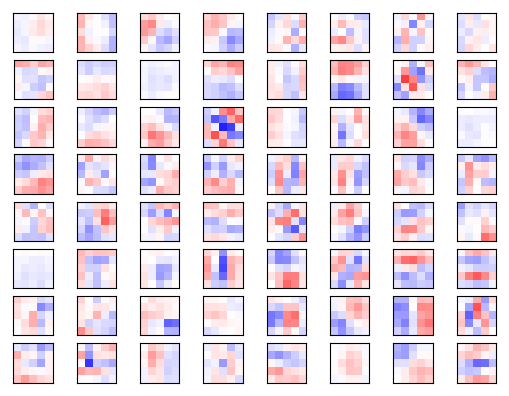

In [129]:
Image(filename = os.path.join(good_dir,'ckpt_MMDGAN.model-15000_conv0-0.png'))

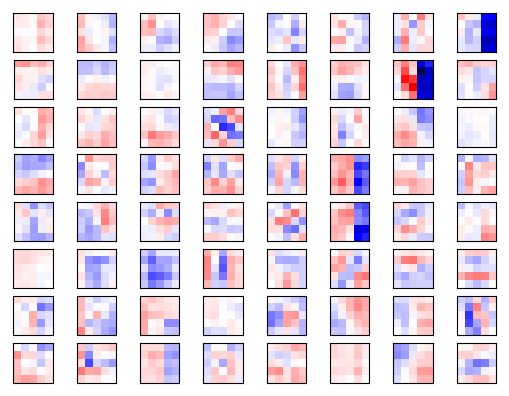

In [130]:
Image(filename = os.path.join(bad_dir,'ckpt_MMDGAN.model-20000_conv0-0.png'))

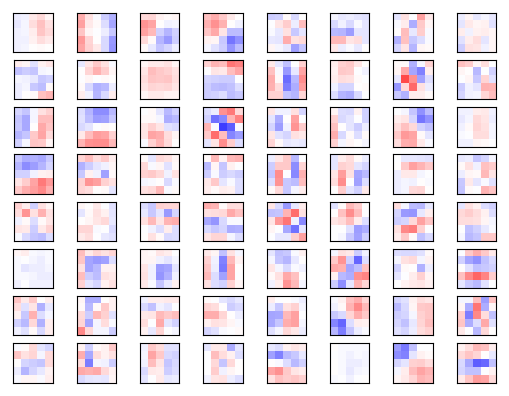

In [131]:
Image(filename = os.path.join(good_dir,'ckpt_MMDGAN.model-15000_conv0-1.png'))

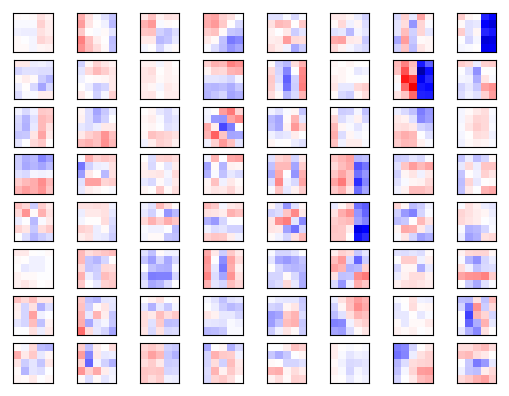

In [132]:
Image(filename = os.path.join(bad_dir,'ckpt_MMDGAN.model-20000_conv0-1.png'))


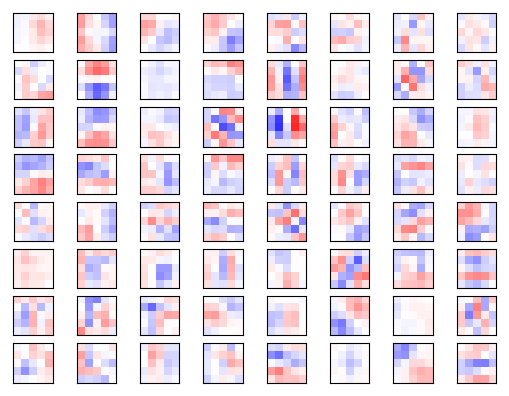

In [133]:
Image(filename = os.path.join(good_dir,'ckpt_MMDGAN.model-15000_conv0-2.png'))

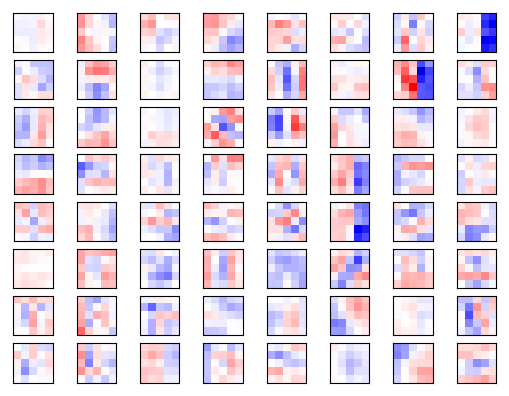

In [134]:
Image(filename = os.path.join(bad_dir,'ckpt_MMDGAN.model-20000_conv0-2.png'))

In [150]:
filter_path = 'sample_mmd/celebA/wmmd_rbf_resnet_scale_8/celebA64x64_g-resnet5_dc_rbfd5-10-1_64_128_lr0.00010000_bn/filters/'
good_data = np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-8000_linear0.npy'))
bad_data  =np.load(os.path.join(filter_path,'ckpt_MMDGAN.model-10000_linear0.npy'))
bad_data = bad_data.T
good_data = good_data.T

In [151]:
bad_data

array([[ 0.02370282,  0.00136329,  0.01945421, ...,  0.00203212,
        -0.00144337, -0.0018782 ]], dtype=float32)

In [152]:
good_data

array([[ 0.01000627, -0.00311565,  0.00600245, ...,  0.00111847,
        -0.00272859,  0.00265992]], dtype=float32)

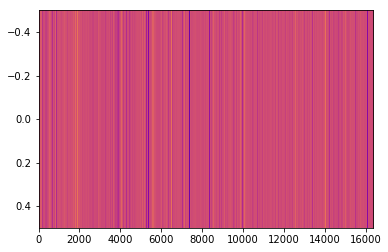

In [153]:
plt.imshow(good_data[:], cmap="plasma", aspect="auto")

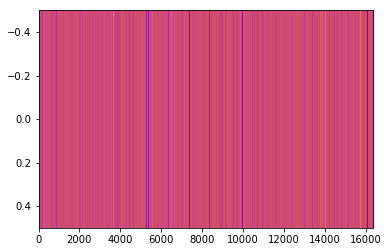

In [154]:
plt.imshow(bad_data[:], cmap="plasma", aspect="auto")